# From Data to Viz

The purpose of this RECAP is to choose the right data visualization for a given question on a dataset.

(Freely inspired from https://www.data-to-viz.com/)

Let's start by running the following cell:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## A - Iris 🌸


Let's explore the Seaborn [**Iris**](https://github.com/mwaskom/seaborn-data/blob/master/iris.csv) dataset, quite known in the Machine Learning beginners community.

Here's a nice picture to get used to the vacobulary around those flowers:

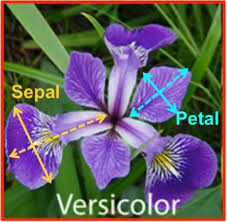

In [2]:
iris_df = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris_df.shape

(150, 5)

---

### ❓ 1 - Counting Species

How many different species are there in the dataset? Use a Seaborn plot to visualize their relative importance.

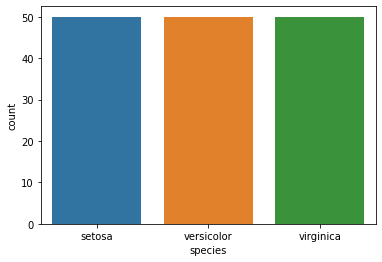

In [4]:
# TODO
sns.countplot(data=iris_df, x="species")

---
### ❓ 2 - Petal Length distribution

Let's see if the petal distribution from the dataset is Normal or not. Use a Seaborn plot to visualize the distribution of the `petal_length` column of `iris_df`.

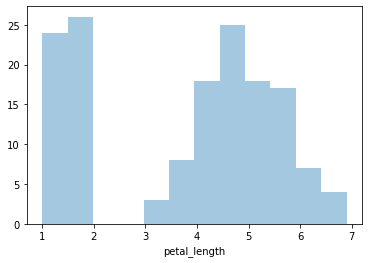

In [7]:
# TODO
sns.distplot(iris_df['petal_length'], kde=False, bins=12)

---
### ❓ 3 - Relationships of Numerical variables

Let's use a Seaborn plot to quickly get a sense of the `(x, y)` relationship of all couples of numerical columns (`sepal_length` / `sepal_width`, `sepal_length` / `petal_length`, etc.). You should use a plot which will draw 16 subplots in one line of code!

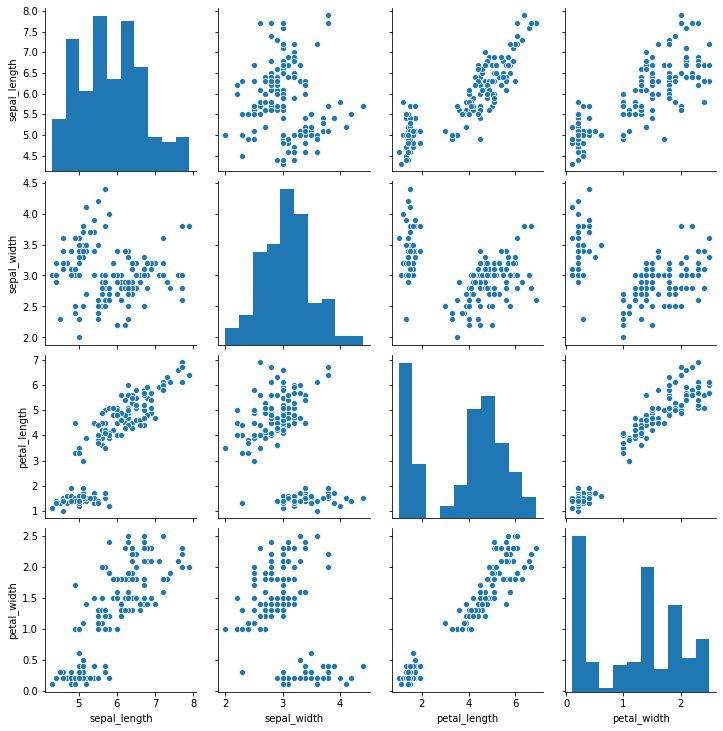

In [8]:
# TODO
sns.pairplot(iris_df)

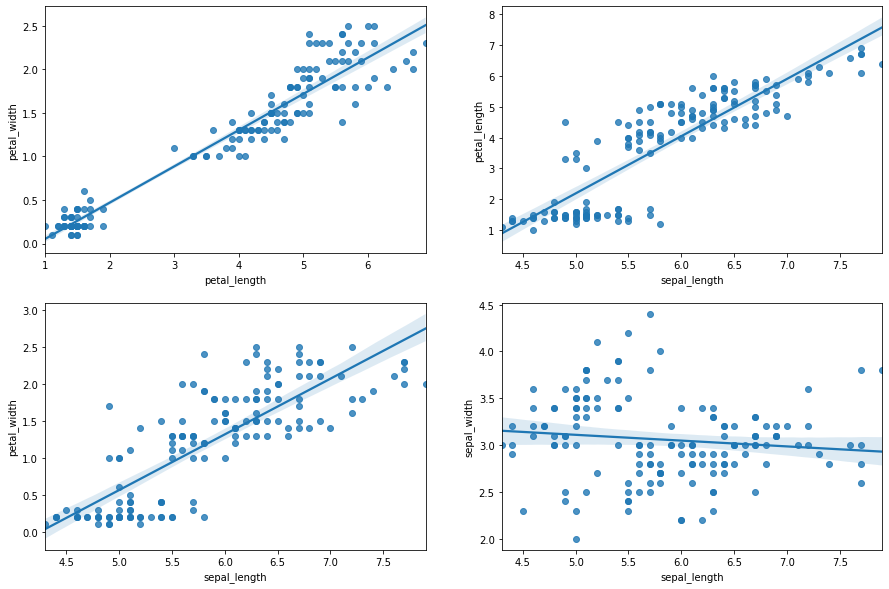

In [13]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
sns.regplot(x="petal_length", y="petal_width", data=iris_df, ax=ax0)
sns.regplot(x="sepal_length", y="petal_length", data=iris_df, ax=ax1)
sns.regplot(x="sepal_length", y="petal_width", data=iris_df, ax=ax2)
sns.regplot(x="sepal_length", y="sepal_width", data=iris_df, ax=ax3)

# fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
# sns.regplot(x="petal_length", y="petal_width", data=iris_df, ax=axs[0, 0])
# sns.regplot(x="sepal_length", y="petal_length", data=iris_df, ax=axs[0, 1])
# sns.regplot(x="sepal_length", y="petal_width", data=iris_df, ax=axs[1, 0])
# sns.regplot(x="sepal_length", y="sepal_width", data=iris_df, ax=axs[1, 1])

---

### ❓ 4 - Numerical + Categorical

We learned a lot about this sample of irises:
- `petal_length` seems to be an important dimension to identify irises
- some of their dimensions are correlated
- there are 3 species
 
How can you visualize the differences between the 3 species of irises with different colors? Using Seaborn, write some code to get scatterplots (we want to use the `species` as colors to better identify groups!).

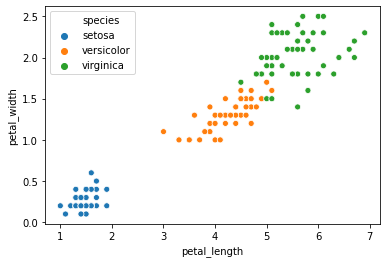

In [15]:
# TODO
sns.scatterplot(x="petal_length", y="petal_width", data=iris_df, hue="species")

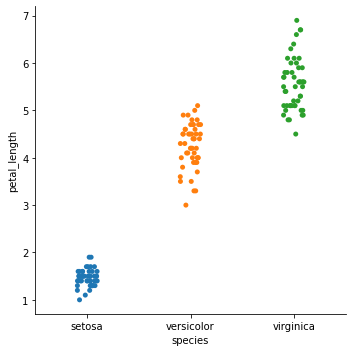

In [16]:
sns.catplot(x="species", y="petal_length", data=iris_df)

---
## B - Maps 🗺

After a lockdown caused by a lethal virus, the population is authorized to move freely again.

😱 **But they can't go further than 100km from home**. How can you help this population to know where they can go?

For this second part of the RECAP, we are using the [`folium`](https://python-visualization.github.io/folium/) package, a wrapper around the [`Leaflet`](https://leafletjs.com/) JavaScript library.

In [17]:
!pip install --quiet folium

Now import Folium:

In [18]:
import folium

---

### ❓ 1 - Draw your first map

The goal of this first question is to:

- Draw a map centered at specific coordinates (check out [gps-coorinates.net](https://www.gps-coordinates.net/))
- Put a marker at that specific point
- Draw a circle of 100km centered at specific point

Check out the [`folium` Quickstart](https://python-visualization.github.io/folium/quickstart.html), you should find all the code examples you need, good luck!

In [19]:
# TODO
coords = [51.5324171,-0.1468063]
mmap = folium.Map(location=coords, zoom_start=8)
folium.Marker(coords).add_to(mmap)
folium.Circle(coords, radius=100_000, fill=True).add_to(mmap)
mmap

---

### ❓ 2 - Build a User-Friendly tool

The problem of the previous code is that we need to manually convert an address into the GPS coordinates. Let's implement a program so that user can specify their plain text address and get the map drawn for that point:

```python
draw_100km_map("138 Kingsland Rd, London E2 8DY")
```

💡 Hint: You can use the [Nominatim Search API](https://nominatim.org/release-docs/latest/api/Search/) to implement a `geocode(address)` function which returns a list of `[lat, lng]` coordinates. 

The interactive tool:

In [20]:
# TODO
import requests
def get_coordinates(address):
    params = { "q": address, 'format': 'json', 'limit': 1 }
#     requests.get(f"https://nominatim.openstreetmap.org/search?q={address}&format=json&limit=1")
    response = requests.get(f"https://nominatim.openstreetmap.org/search", params=params).json()
    return (response[0]['lat'], response[0]['lon'])

In [21]:
def create_map(address):
    coords = get_coordinates(address)
    mmap = folium.Map(location=coords, zoom_start=8)
    folium.Marker(coords).add_to(mmap)
    folium.Circle(coords, radius=100_000, fill=True).add_to(mmap)
    return mmap

In [22]:
address = input('enter an address\n')
create_map(address)

enter an address
138 kingsland road london


## Implement the following functions and plot them

$$y1 = x^2 = x * x$$
$$y2 = log(x)$$
$$y3 = e^x$$
$$y4 = e^x/(e^x + 1)$$

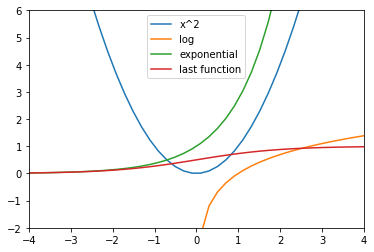

In [41]:
import math
x = np.linspace(-10, 10, 100)
y1 = x * x

# y2 = []
# for number in x:
#     if number > 0:
#         number_log = math.log(number)
#         y2.append(number_log)
# x_positives = []
# for number in x:
#     if number > 0:
#         x_positives.append(number)

y2 = [math.log(number) for number in x if number > 0]
x_positives = [number for number in x if number > 0]

y3 = [math.exp(number) for number in x]
y4 = [math.exp(number) / (math.exp(number) + 1) for number in x]

plt.xlim(-4, 4)
plt.ylim(-2, 6)
plt.plot(x, y1, label="x^2")
plt.plot(x_positives, y2, label="log")
plt.plot(x, y3, label="exponential")
plt.plot(x, y4, label="last function")
plt.legend()
plt.show()